In [20]:
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import keras

In [10]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.applications import inception_resnet_v2
#from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, RMSprop
from keras import regularizers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, ZeroPadding2D
from tensorflow.keras.layers import Dropout, Flatten, Input, Dense

In [5]:
datagen_train = ImageDataGenerator(
    rescale=1./255,
      rotation_range=180,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.1,
      zoom_range=[0.9, 1.5],
      horizontal_flip=True,
      vertical_flip=True,
      fill_mode='nearest')

In [6]:
path = '/home/jgomez/Documents/Us'

In [7]:
train_dir = path + "/train"
test_dir = path+"/val"

In [8]:
batch_size = 8
img_height = 224
img_width = 224

In [29]:
model = Sequential()

model.add(Conv2D(input_shape=(224,224,3),filters=64,
kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,
kernel_size=(3,3),padding="same", activation="relu"))

model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3),
padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3),
padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3),
padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3),
padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3),
padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3),
padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3),
padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3),
padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3),
padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3),
padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())

model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))

model.add(Dense(units=2, activation="sigmoid"))

model.compile(optimizer= keras.optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_56 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 56, 56, 256)      

In [15]:
input_shape = model.layers[0].output_shape[1:3]
input_shape

(224, 224)

In [16]:
generator_train = datagen_train.flow_from_directory(directory=train_dir,
                                                    target_size=input_shape,
                                                    batch_size=batch_size,
                                                    shuffle=True)

Found 45646 images belonging to 2 classes.


In [17]:
datagen_test = ImageDataGenerator(rescale=1./255)

In [18]:
generator_test = datagen_test.flow_from_directory(directory=test_dir,
                                                  target_size=input_shape,
                                                  batch_size=batch_size,
                                                  shuffle=False)

Found 1194 images belonging to 2 classes.


In [30]:
h = model.fit(
    generator_train,
    validation_data=generator_test,
    epochs=50, 
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=15),
        tf.keras.callbacks.ModelCheckpoint('models/model_{val_accuracy:.3f}.h5', save_best_only=True,
                                          save_weights_only=False, monitor='val_accuracy')
    ]
)

Epoch 1/50
5706/5706 [==============================] - 10043s 2s/step - loss: 19.5189 - accuracy: 0.5002 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/50
5706/5706 [==============================] - 10072s 2s/step - loss: 0.6932 - accuracy: 0.4935 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/50
5706/5706 [==============================] - 10094s 2s/step - loss: 0.6931 - accuracy: 0.5045 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/50
5706/5706 [==============================] - 10088s 2s/step - loss: 0.6932 - accuracy: 0.5029 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/50
5706/5706 [==============================] - 10079s 2s/step - loss: 0.6932 - accuracy: 0.4971 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/50
5706/5706 [==============================] - 10124s 2s/step - loss: 0.6932 - accuracy: 0.4979 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/50
5706/5706 [==============================] - 10114s 2s/step - loss: 0.6933 - accuracy: 0.4933 - val_loss: 

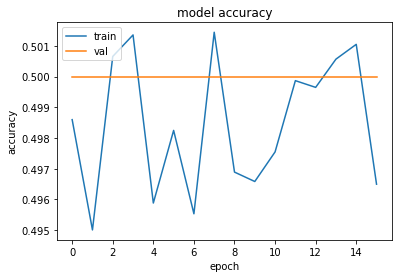

In [31]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

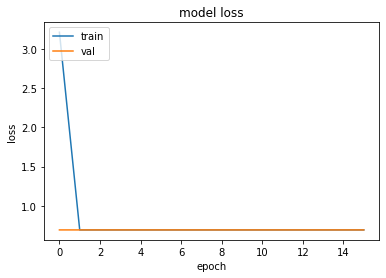

In [32]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()